<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/KNN_worked_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from https://www.kaggle.com/anuchacko/knn-classifier-tutorial/edit

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization

In [ ]:
data = 'breast-cancer-wisconsin.data.txt'

df = pd.read_csv(data, header=None)

Exploratory Data Analysis and Cleaning

In [ ]:
df.shape

(700, 11)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,id,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


Drop redundant columns

We should drop any redundant columns from the dataset which does not have any predictive power. Here, Id is the redundant column.

In [ ]:
df.drop('Id', axis=1, inplace=True)
df.drop(df.index[0])

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
695,3,1,1,1,3,2,1,1,1,2
696,2,1,1,1,2,1,1,1,1,2
697,5,10,10,3,7,3,8,10,2,4
698,4,8,6,4,3,4,10,6,1,4


View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              700 non-null    object
 1   Uniformity_Cell_Size         700 non-null    object
 2   Uniformity_Cell_Shape        700 non-null    object
 3   Marginal_Adhesion            700 non-null    object
 4   Single_Epithelial_Cell_Size  700 non-null    object
 5   Bare_Nuclei                  700 non-null    object
 6   Bland_Chromatin              700 non-null    object
 7   Normal_Nucleoli              700 non-null    object
 8   Mitoses                      700 non-null    object
 9   Class                        700 non-null    object
dtypes: object(10)
memory usage: 54.8+ KB


Frequency distribution of values in variables

In [ ]:
for var in df.columns:
    
    print(df[var].value_counts())

1                  145
5                  130
3                  108
4                   80
10                  69
2                   50
8                   46
6                   34
7                   23
9                   14
clump_thickness      1
Name: Clump_thickness, dtype: int64
1                384
10                67
3                 52
2                 45
4                 40
5                 30
8                 29
6                 27
7                 19
9                  6
uni_cell_size      1
Name: Uniformity_Cell_Size, dtype: int64
1                 353
2                  59
10                 58
3                  56
4                  44
5                  34
6                  30
7                  30
8                  28
9                   7
uni_cell_shape      1
Name: Uniformity_Cell_Shape, dtype: int64
1                407
3                 58
2                 58
10                55
4                 33
8                 25
5                 23
6       

Convert data type of Bare_Nuclei to integer

In [ ]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df['Clump_thickness']=pd.to_numeric(df['Clump_thickness'], errors='coerce')
df['Uniformity_Cell_Size']=pd.to_numeric(df['Uniformity_Cell_Size'], errors='coerce')
df['Marginal_Adhesion']=pd.to_numeric(df['Marginal_Adhesion'], errors='coerce')
df['Bland_Chromatin']=pd.to_numeric(df['Bland_Chromatin'], errors='coerce')
df['Normal_Nucleoli']=pd.to_numeric(df['Normal_Nucleoli'], errors='coerce')
df['Mitoses']=pd.to_numeric(df['Mitoses'], errors='coerce')
df['Single_Epithelial_Cell_Size']=pd.to_numeric(df['Single_Epithelial_Cell_Size'], errors='coerce')
df['Uniformity_Cell_Shape']=pd.to_numeric(df['Uniformity_Cell_Shape'], errors='coerce')


In [ ]:
df['Class']=pd.to_numeric(df['Class'],errors='coerce')

In [ ]:
df.dtypes



Clump_thickness                float64
Uniformity_Cell_Size           float64
Uniformity_Cell_Shape          float64
Marginal_Adhesion              float64
Single_Epithelial_Cell_Size    float64
Bare_Nuclei                    float64
Bland_Chromatin                float64
Normal_Nucleoli                float64
Mitoses                        float64
Class                          float64
dtype: object

In [ ]:
df.isnull().sum()

Clump_thickness                 1
Uniformity_Cell_Size            1
Uniformity_Cell_Shape           1
Marginal_Adhesion               1
Single_Epithelial_Cell_Size     1
Bare_Nuclei                    17
Bland_Chromatin                 1
Normal_Nucleoli                 1
Mitoses                         1
Class                           1
dtype: int64

In [ ]:
df['Class'].value_counts()


2.0    458
4.0    241
Name: Class, dtype: int64

In [ ]:
df.head(5)

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
3,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
4,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0


In [ ]:
df=df.drop(df.index[0])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    float64
 1   Uniformity_Cell_Size         699 non-null    float64
 2   Uniformity_Cell_Shape        699 non-null    float64
 3   Marginal_Adhesion            699 non-null    float64
 4   Single_Epithelial_Cell_Size  699 non-null    float64
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    float64
 7   Normal_Nucleoli              699 non-null    float64
 8   Mitoses                      699 non-null    float64
 9   Class                        699 non-null    float64
dtypes: float64(10)
memory usage: 60.1 KB


check percentage of frequency distribution of Class

In [ ]:
df['Class'].value_counts()/np.float(len(df))

2.0    0.655222
4.0    0.344778
Name: Class, dtype: float64

Outliers in numerical variables

In [ ]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  ...  Normal_Nucleoli  Mitoses
count           699.00                699.00  ...           699.00   699.00
mean              4.42                  3.13  ...             2.87     1.59
std               2.82                  3.05  ...             3.05     1.72
min               1.00                  1.00  ...             1.00     1.00
25%               2.00                  1.00  ...             1.00     1.00
50%               4.00                  1.00  ...             1.00     1.00
75%               6.00                  5.00  ...             4.00     1.00
max              10.00                 10.00  ...            10.00    10.00

[8 rows x 9 columns]


Now, we have a basic understanding of our data. 

Supplement it with some data visualization to get better understanding of our data.

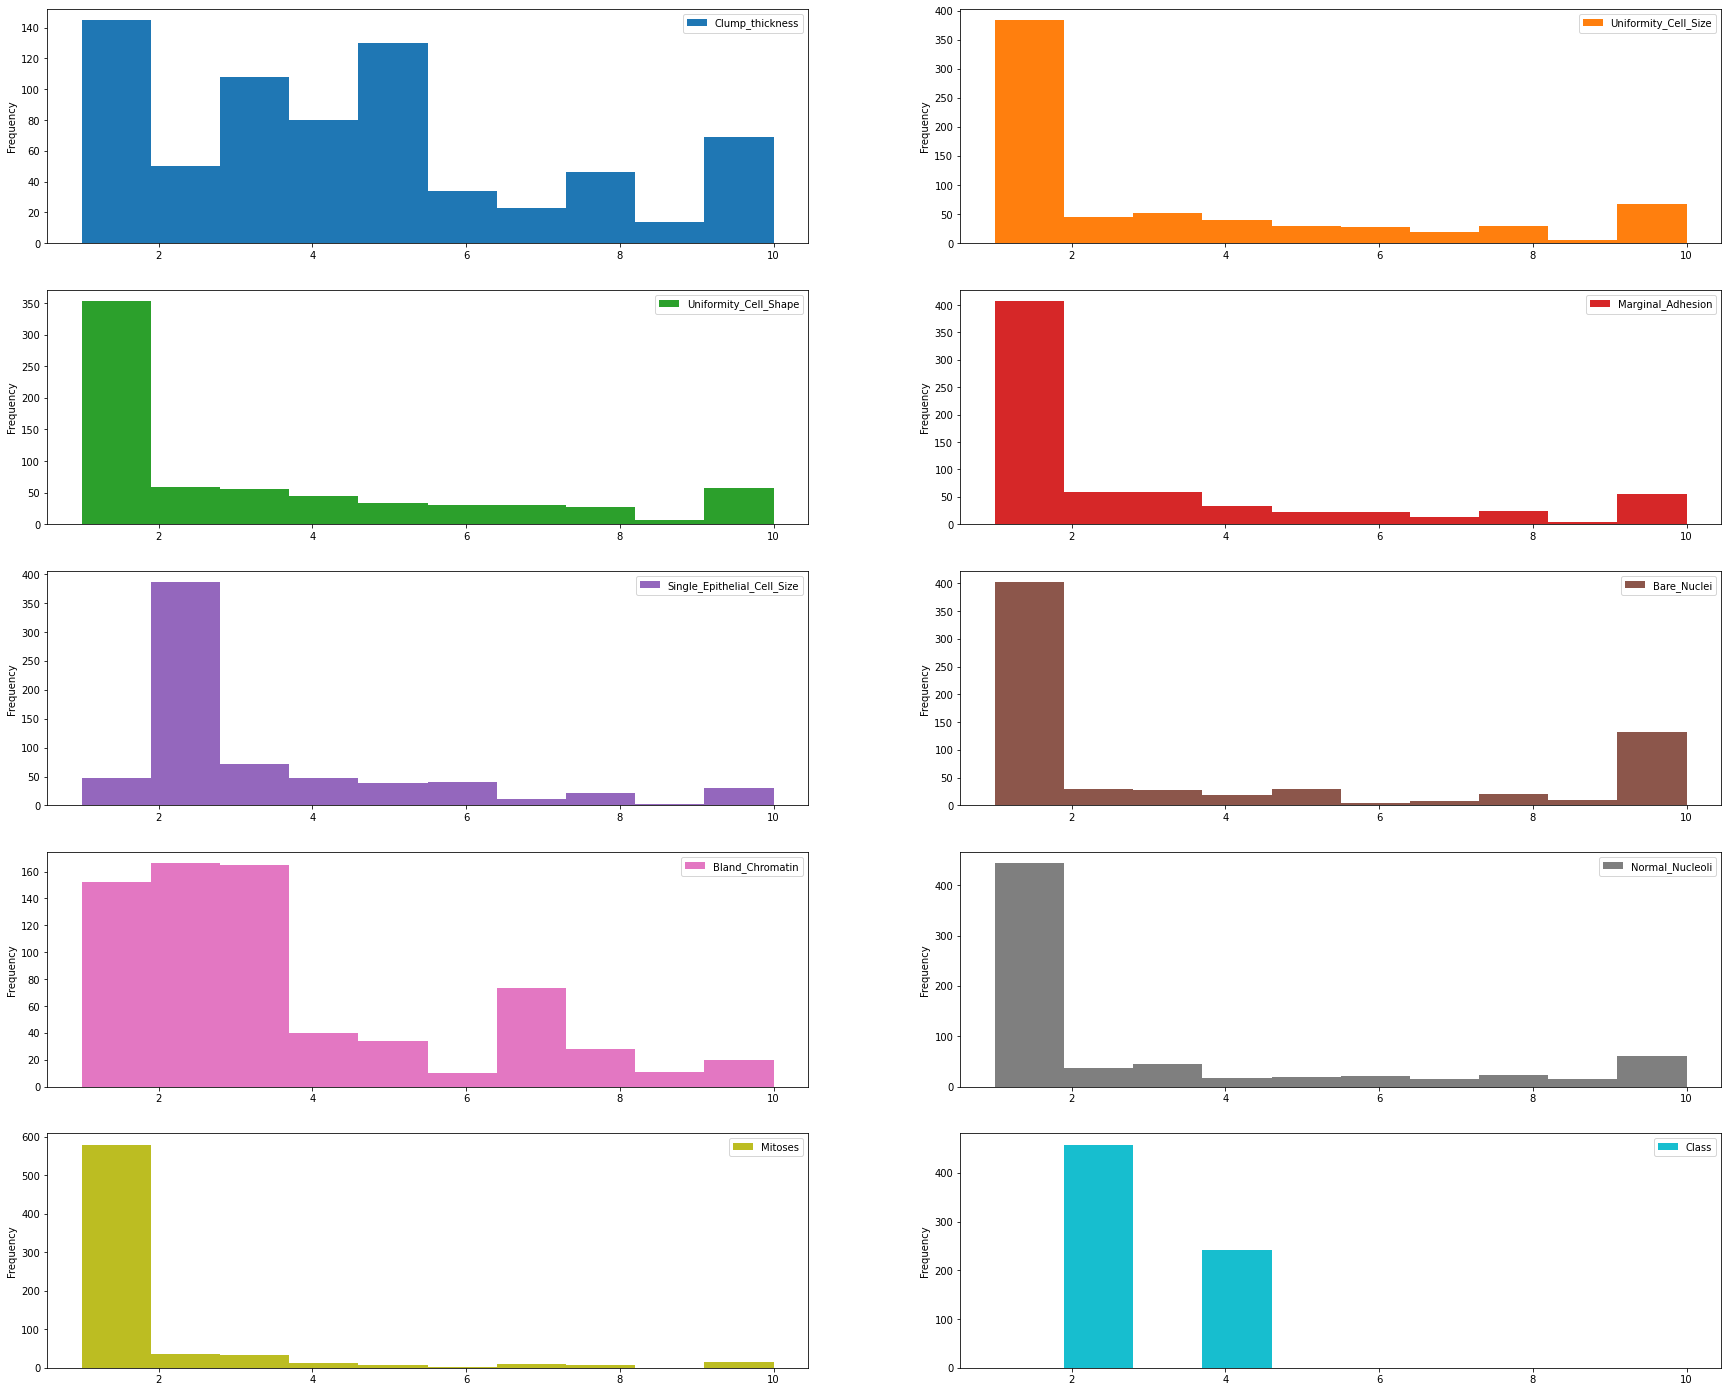

In [ ]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

We can see that all the variables in the dataset are positively skewed.

**Multivariate plots**

Estimating correlation coefficients

Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:-

In [ ]:
correlation = df.corr()
print(correlation)


                             Clump_thickness  ...     Class
Clump_thickness                     1.000000  ...  0.716001
Uniformity_Cell_Size                0.644913  ...  0.817904
Uniformity_Cell_Shape               0.654589  ...  0.818934
Marginal_Adhesion                   0.486356  ...  0.696800
Single_Epithelial_Cell_Size         0.521816  ...  0.682785
Bare_Nuclei                         0.593091  ...  0.822696
Bland_Chromatin                     0.558428  ...  0.756616
Normal_Nucleoli                     0.535835  ...  0.712244
Mitoses                             0.350034  ...  0.423170
Class                               0.716001  ...  1.000000

[10 rows x 10 columns]


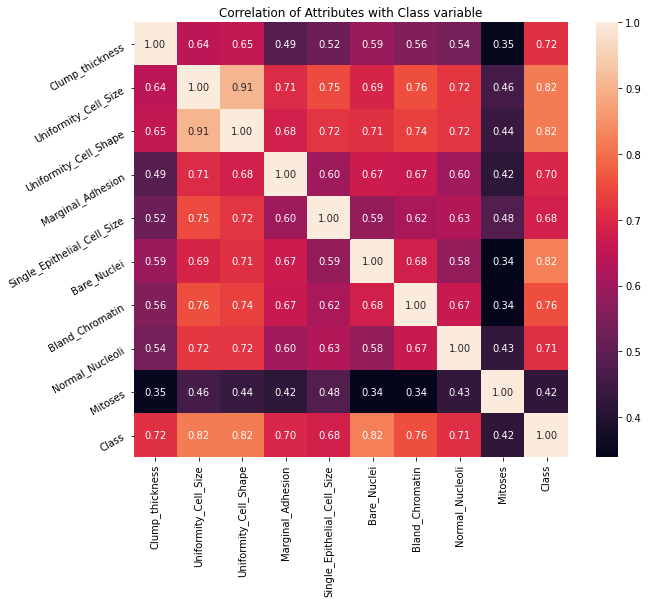

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

Interpretation

The correlation coefficient ranges from -1 to +1.

*   When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

*   When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.




We can see that all the variables are positively correlated with Class variable. 

Some variables are strongly positive correlated while some variables are negatively correlated.

 **Declare feature vector and target variable**

In [ ]:
X = df.drop(['Class'], axis=1)

y = df['Class']

Split data into separate training and test set

In [ ]:
print(y)

1      2.0
2      2.0
3      2.0
4      2.0
5      2.0
      ... 
695    2.0
696    2.0
697    4.0
698    4.0
699    4.0
Name: Class, Length: 699, dtype: float64


In [ ]:
print(X)

     Clump_thickness  Uniformity_Cell_Size  ...  Normal_Nucleoli  Mitoses
1                5.0                   1.0  ...              1.0      1.0
2                5.0                   4.0  ...              2.0      1.0
3                3.0                   1.0  ...              1.0      1.0
4                6.0                   8.0  ...              7.0      1.0
5                4.0                   1.0  ...              1.0      1.0
..               ...                   ...  ...              ...      ...
695              3.0                   1.0  ...              1.0      1.0
696              2.0                   1.0  ...              1.0      1.0
697              5.0                  10.0  ...             10.0      2.0
698              4.0                   8.0  ...              6.0      1.0
699              4.0                   8.0  ...              4.0      1.0

[699 rows x 9 columns]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [ ]:
y_train.shape,y_test.shape

((559,), (140,))

Feature Engineering 


Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [ ]:
X_train.dtypes

Clump_thickness                float64
Uniformity_Cell_Size           float64
Uniformity_Cell_Shape          float64
Marginal_Adhesion              float64
Single_Epithelial_Cell_Size    float64
Bare_Nuclei                    float64
Bland_Chromatin                float64
Normal_Nucleoli                float64
Mitoses                        float64
dtype: object

In [ ]:
# Missing Value imputation
X_train.isnull().sum()
X_test.isnull().sum()
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Clump_thickness 0.0018
Uniformity_Cell_Size 0.0018
Uniformity_Cell_Shape 0.0018
Marginal_Adhesion 0.0018
Single_Epithelial_Cell_Size 0.0018
Bare_Nuclei 0.0286
Bland_Chromatin 0.0018
Normal_Nucleoli 0.0018
Mitoses 0.0018


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [ ]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)   

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X_train.isnull().sum()
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [ ]:
X_train.head()
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
477,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
532,4.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0
41,6.0,6.0,6.0,9.0,6.0,1.0,7.0,8.0,1.0
433,5.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
15,8.0,7.0,5.0,10.0,7.0,9.0,5.0,5.0,4.0


**Fit K Neighbours Classifier to the training**

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
X_train.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [ ]:
# Predict test results
y_pred = knn.predict(X_test)

y_pred

array([2., 2., 4., 2., 4., 2., 4., 2., 4., 4., 2., 2., 4., 4., 4., 2., 2.,
       4., 4., 2., 4., 4., 2., 2., 2., 4., 2., 2., 4., 4., 2., 2., 2., 2.,
       2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 4., 2., 4., 2., 4., 4.,
       2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 2., 4., 4., 4., 4., 2.,
       2., 4., 2., 2., 4., 4., 2., 2., 2., 2., 4., 2., 2., 2., 4., 2., 2.,
       2., 4., 2., 4., 4., 2., 2., 2., 4., 2., 2., 2., 4., 2., 4., 4., 2.,
       2., 2., 4., 2., 2., 2., 2., 2., 4., 4., 4., 2., 2., 2., 2., 2., 4.,
       4., 4., 4., 2., 4., 2., 2., 4., 4., 4., 4., 4., 2., 2., 4., 4., 2.,
       2., 4., 2., 2.])

In [ ]:
#predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

#2 is for probability of benign cancer and 4 is for probability of malignant cancer.

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.33333333,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.66666667,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [ ]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.66666667,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.33333333,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.66666667,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9786


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9786


In [ ]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9786


In [ ]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


In [ ]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


In [ ]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9786


In [ ]:
# instantiate the model with k=25
knn_25 = KNeighborsClassifier(n_neighbors=25)


# fit the model to the training set
knn_25.fit(X_train, y_train)


# predict on the test-set
y_pred_25 = knn_25.predict(X_test)


print('Model accuracy score with k=10 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_25)))

Model accuracy score with k=10 : 0.9714


**Confusion matrix** 


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


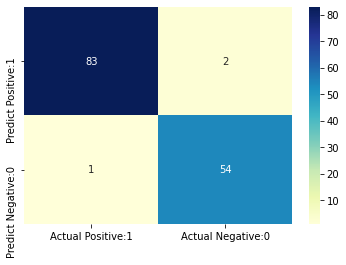

In [ ]:
#visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')